# ПРАКТИЧЕСКАЯ РАБОТА №1
### _Анализ инструментов МО_

# Введение

Библиотека _scikit-learn_ (часто записывается как sklearn) — это одна из самых популярных и удобных библиотек Python для машинного обучения. Она предоставляет согласованный и простой в использовании API для широкого спектра задач: от классификации и регрессии до кластеризации и понижения размерности.

__Цель данного задания__: на практических примерах познакомиться с основными направлениями применения scikit-learn и закрепить понимание стандартного рабочего процесса машинного обучения.




## 1. Подготовка и настройка среды

Первым шагом импортируем необходимые библиотеки.

In [ ]:
# Импорт основных библиотек для работы с данными и визуализации
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Магическая команда для отображения графиков прямо в ноутбуке
%matplotlib inline

# Настройка стиля графиков для лучшей визуализации
plt.style.use('ggplot')
sns.set_palette("husl")

# Игнорирование предупреждений (для чистоты вывода)
import warnings
warnings.filterwarnings('ignore')
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Тест")
plt.show()

In [1]:
# Проверяем версию scikit-learn
import sklearn
print(f"Версия scikit-learn: {sklearn.__version__}")

ModuleNotFoundError: No module named 'sklearn'

## 2. Задача классификации на примере ирисов Фишера

Классификация — это задача предсказания категориальной (дискретной) метки на основе входных признаков.

### 2.1. Загрузка и разведовательный анализ данных (EDA)

In [ ]:
# Классический датасет "Ирисы" уже встроен в sklearn
from sklearn.datasets import load_iris

# Загружаем датасет
iris = load_iris()

# Смотрим на описание датасета
print(iris.DESCR[:500] + "\n...") # Выведем только начало для краткости

In [ ]:
# Преобразуем данные в DataFrame для удобства
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Добавляем целевую переменную (вид ириса)
iris_df['target'] = iris.target
iris_df['target_name'] = iris_df['target'].apply(lambda x: iris.target_names[x])

# Выведем первые 5 строк
iris_df.head()

In [ ]:
# Базовая статистика по данным
iris_df.describe()

In [ ]:
# Визуализируем данные с помощью Pairplot
sns.pairplot(iris_df, hue='target_name', diag_kind='hist', palette='viridis')
plt.suptitle("Pairplot для набора данных Iris", y=1.02)
plt.show()

### Теоретический вопрос 1:

_Что такое целевая переменная (target) в этом наборе данных?_

_Какие признаки (features) используются для ее предсказания?_

_По визуализации выше, какие пары признаков, по вашему мнению, лучше всего разделяют виды ирисов?_

## Вставить ответ в данное поле

Ваш ответ:
1. target целевая переменная - вид цветка ириса. В библиотек sklearn находится в iris.target.
2. Признаки: длина чашелиста, ширина чашелиста, длина лепестка, ширина лепестка.
3. Petal length (cm) vs Petal width (cm) и Petal length (cm) vs Sepal length (cm)



### 2.2. Подготовка данных и обучение модели

Стандартный шаг — разделить данные на обучающую и тестовую выборки.

In [ ]:
from sklearn.model_selection import train_test_split

# X - матрица признаков, y - вектор целевой переменной
X = iris_df[iris.feature_names] # Все колонки с признаками
y = iris_df['target'] # Колонка с видом ириса

# Разделяем данные: 70% на обучение, 30% на тестирование
# random_state для воспроизводимости результатов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

In [ ]:
# Импортируем модель (алгоритм) для классификации - Дерево решений
from sklearn.tree import DecisionTreeClassifier

# Создаем экземпляр модели
model_dt = DecisionTreeClassifier(random_state=42)

# Обучаем модель на обучающих данных
model_dt.fit(X_train, y_train)

### 2.3. Оценка качества модели

In [ ]:
# Делаем предсказания на тестовой выборке
y_pred = model_dt.predict(X_test)

# Оцениваем точность (accuracy)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

In [ ]:
# Более детальный отчет по метрикам классификации
print("Отчет по классификации:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

In [ ]:
# Матрица ошибок (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Матрица ошибок для классификации Ирисов')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()

## Теоретический вопрос 2:

_Что показывает матрица ошибок? Какие классы наша модель путает больше всего?_

_Что означают метрики precision и recall в отчете выше? Чем они отличаются от точности (accuracy)?_

### Вставить ответ в данное поле

Ваш ответ:
1. Матрица ошибок показывает сколько объектов предстаказано верно и сколько объектов спутано.
Модель чаще всего путает Iris-versicolor и Iris-verginica.
2. Precision - модель предсказаний которые относятся к данному классу.
Recall - метод насколько модель видит объекты.

## 3. Задача регрессионного анализа на примере предсказания цен на жилье

__Регрессия__ — это задача предсказания непрерывной числовой величины.

### 3.1. Работа с данными для регрессии

In [ ]:
# Загрузим встроенный датасет о ценах на дома в Бостоне
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

# Создаем DataFrame
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df['PRICE'] = housing.target # Целевая переменная - цена

print("Размерность данных:", housing_df.shape)
housing_df.head()

In [ ]:
# Посмотрим на распределение целевой переменной (цены)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
housing_df['PRICE'].hist(bins=50)
plt.title('Распределение цен')

plt.subplot(1, 2, 2)
# Посмотрим на связь одного из признаков (среднего числа комнат) с ценой
plt.scatter(housing_df['AveRooms'], housing_df['PRICE'], alpha=0.5)
plt.xlabel('Среднее число комнат')
plt.ylabel('Цена')
plt.title('Зависимость цены от числа комнат')
plt.tight_layout()
plt.show()

### 3.2. Обучение и оценка модели регрессии

In [ ]:
# Разделяем данные
X_h = housing_df.drop('PRICE', axis=1)
y_h = housing_df['PRICE']

X_h_train, X_h_test, y_h_train, y_h_test = train_test_split(X_h, y_h, test_size=0.2, random_state=42)

In [ ]:
# Используем линейную регрессию
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Создаем и обучаем модель
model_lr = LinearRegression()
model_lr.fit(X_h_train, y_h_train)

# Делаем предсказания
y_h_pred = model_lr.predict(X_h_test)

In [ ]:
# Оцениваем качество регрессии
mse = mean_squared_error(y_h_test, y_h_pred)
r2 = r2_score(y_h_test, y_h_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

In [ ]:
# Визуализируем предсказания vs Реальные значения
plt.figure(figsize=(8, 6))
plt.scatter(y_h_test, y_h_pred, alpha=0.7)
plt.plot([y_h_test.min(), y_h_test.max()], [y_h_test.min(), y_h_test.max()], 'k--', lw=2) # Идеальная прямая
plt.xlabel('Реальная цена')
plt.ylabel('Предсказанная цена')
plt.title('Реальные vs Предсказанные цены на жилье')
plt.show()

### Теоретический вопрос 3:

_Что показывает метрика R^2 (коэффициент детерминации)? Как интерпретировать значение, полученное в вашем эксперименте?_

_Почему на графике "Реальные vs Предсказанные значения" идеальная модель легла бы на пунктирную линию?_

### Вставить ответ в данное поле

Ваш ответ:
1. R^2 показывает качество регресеонной модели. Считается по формуле: 1 - (ошибка модели / ошибка константной модели)
2. Модель объясняет 70% изменения цены жилья на тестовой выборке, оставшиеся 30% — шум, ошибки модели, непредсказуемые факторы.
Если R² низкий (например, < 0.3), значит: либо признаки плохо объясняют цену, либо модель слишком простая, либо данные содержат много шума, либо нужно нелинейная модель. Если R² близок к 1, модель работает очень хорошо. Идеальная модель: предстказание без ошибок(предсказанное значение совпадает с действиетльным)

## 4. Кластеризация на примере ирисов (без учителя)

__Кластеризация__ — это задача разделения данных на группы (кластеры) без использования заранее известных меток.

### 4.1. Применение алгоритма K-Means

In [ ]:
from sklearn.cluster import KMeans

# Возьмем только признаки из датасета ирисов (без целевой переменной!)
X_iris = iris_df[iris.feature_names]

# Создаем модель K-Means с 3 кластерами (т.к. мы знаем, что видов ириса 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Обучаем модель (в кластеризации это называется "fitting")
kmeans.fit(X_iris)

# Получаем метки кластеров для каждого наблюдения
cluster_labels = kmeans.labels_

# Добавляем метки кластеров в наш DataFrame
iris_df['cluster'] = cluster_labels
iris_df.head()

### 4.2. Визуализация результатов кластеризации

In [ ]:
# Сравним реальные виды ирисов с найденными кластерами
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# График 1: Истинные классы
scatter1 = axes[0].scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'],
                           c=iris_df['target'], cmap='viridis')
axes[0].set_xlabel('Длина лепестка (cm)')
axes[0].set_ylabel('Ширина лепестка (cm)')
axes[0].set_title('Истинные классы (Вид ириса)')
plt.colorbar(scatter1, ax=axes[0])

# График 2: Результаты кластеризации
scatter2 = axes[1].scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'],
                           c=iris_df['cluster'], cmap='viridis')
axes[1].set_xlabel('Длина лепестка (cm)')
axes[1].set_ylabel('Ширина лепестка (cm)')
axes[1].set_title('Кластеры, найденные K-Means')
plt.colorbar(scatter2, ax=axes[1])

plt.show()

### Теоретический вопрос 4:

Совпадают ли кластеры, найденные алгоритмом K-Means, с истинными видами ирисов? Почему это могло произойти?

В чем основное различие между задачами классификации и кластеризации?

### Вставить ответ в данное поле

Ваш ответ: Кластеры найденные алгоритмом K-Means совпадают частично! K-Means пытается разделить данные на кластер. Порядок нумерации случайный. Кластеры совпадают частично потому что нет информации об истинных метках.
Классификация — есть известные метки классов, цель — предсказать класс для нового наблюдения, supervised, оценивается через accuracy/F1; Кластеризация — меток нет, цель — найти структуры и группы в данных, unsupervised, оценивается через silhouette score/внутрикластерное расстояние

## 5: Дерево решений и интерпретация моделей

_Деревья решений_ — это один из самых интерпретируемых алгоритмов машинного обучения, который позволяет понять, как именно модель принимает решения.

### **5.1. Классификация ирисов с помощью дерева решений**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn import tree
import graphviz

In [ ]:
# Загрузка данных
iris = load_iris()
X_tree = iris.data
y_tree = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

In [ ]:
# Разделение данных
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(
    X_tree, y_tree, test_size=0.3, random_state=42
)

In [ ]:
# Создание и обучение дерева решений
tree_classifier = DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)
tree_classifier.fit(X_tree_train, y_tree_train)

In [ ]:
# Оценка качества
tree_train_score = tree_classifier.score(X_tree_train, y_tree_train)
tree_test_score = tree_classifier.score(X_tree_test, y_tree_test)
print(f"Точность на обучающей выборке: {tree_train_score:.3f}")
print(f"Точность на тестовой выборке: {tree_test_score:.3f}")

### 5.2. Визуализация дерева решений

In [ ]:
# Визуализация дерева с помощью matplotlib
plt.figure(figsize=(20, 10))
plot_tree(tree_classifier, 
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Дерево решений для классификации ирисов")
plt.show()

In [ ]:
# Текстовая визуализация правил
tree_rules = export_text(tree_classifier, feature_names=feature_names)
print("Правила дерева решений:")
print(tree_rules)

### 5.3. Анализ важности признаков


In [ ]:
# Текстовая визуализация правил
tree_rules = export_text(tree_classifier, feature_names=feature_names)
print("Правила дерева решений:")
print(tree_rules)

In [ ]:
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='importance', y='feature')
plt.title('Важность признаков в дереве решений')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

### 5.4. Исследование влияния глубины дерева

In [ ]:
# Изучение влияния максимальной глубины на качество
max_depths = range(1, 11)
train_scores = []
test_scores = []

for depth in max_depths:
    tree_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_temp.fit(X_tree_train, y_tree_train)
    train_scores.append(tree_temp.score(X_tree_train, y_tree_train))
    test_scores.append(tree_temp.score(X_tree_test, y_tree_test))

In [ ]:
# График влияния глубины дерева
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, 'o-', label='Обучающая выборка')
plt.plot(max_depths, test_scores, 'o-', label='Тестовая выборка')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Точность')
plt.title('Влияние глубины дерева на качество классификации')
plt.legend()
plt.grid(True)
plt.show()

### 5.5. Визуализация границ принятия решений

In [ ]:
# Визуализация границ решений для двух наиболее важных признаков
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
# Используем два наиболее важных признака
important_features = [2, 3]  # petal length, petal width
X_2d = X_tree[:, important_features]

In [ ]:
# Обучаем дерево на двух признаках
tree_2d = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_2d.fit(X_2d, y_tree)

In [ ]:
# Визуализация границ решений
plt.figure(figsize=(12, 8))
DecisionBoundaryDisplay.from_estimator(
    tree_2d,
    X_2d,
    response_method="predict",
    cmap=plt.cm.RdYlBu,
    alpha=0.8
)

In [ ]:
# Отображаем исходные данные
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_tree, cmap=plt.cm.RdYlBu, edgecolor='black')
plt.xlabel(feature_names[important_features[0]])
plt.ylabel(feature_names[important_features[1]])
plt.title('Границы решений дерева (два наиболее важных признака)')
plt.legend(handles=scatter.legend_elements()[0], labels=class_names.tolist())
plt.colorbar(scatter)
plt.show()

### Теоретические вопросы к разделу 5:

1. Как интерпретировать узлы дерева решений? Что означает значение "gini" в каждом узле?
Как понимать разделяющие условия?
2. Как глубина дерева влияет на переобучение? Почему с увеличением глубины точность на обучающих данных растет, а на тестовых может падать? Какая глубина оптимальна для этого набора данных?
3. Какие признаки наиболее важны для классификации ирисов?
Почему размер лепестков (petal) важнее размера чашелистиков (sepal)?
4. Каковы преимущества и недостатки каждого подхода?
Как дерево решений принимает решения?
Можете ли вы проследить путь предсказания для конкретного цветка по текстовым правилам?

### Вставить ответ в данное поле

Ваш ответ:
1. Интерпретация узлов: каждый узел показывает условие разделения признака; gini отражает индекс Джини — мера неоднородности классов в узле (0 — полностью чистый узел, 0.5 — равномерное распределение).
2. Глубина дерева и переобучение: увеличение глубины позволяет модели лучше подстраиваться под обучающие данные, повышая точность, но на тестовых данных может появиться переобучение; для ирисов оптимальная глубина ≈ 3.
3. Наиболее важные признаки: petal length и petal width; они лучше разделяют виды ирисов, чем sepal length/width, так как различия между видами ярче выражены в размерах лепестков.
4. Преимущества и недостатки: дерево решений легко интерпретировать, визуализировать и трассировать путь предсказания, но склонно к переобучению при большой глубине; решение принимается по последовательным условиям узлов, путь предсказания конкретного цветка можно проследить по текстовым правилам.

## Задание для выполнения

__Задача__: Провести полный цикл анализа для датасета в соответствии с вариантом
_номер студента по списку_ .

Задание 1: Классификация данных

Цель: Построить модель классификации данных из датасета по их характеристикам.

Задания:
 1. Провести разведочный анализ данных (описательные статистики, распределение целевой переменной)
 2. Разделить данные на обучающую и тестовую выборки (70/30)
 3. Обучить 3 различные модели классификации (KNeighborsClassifier, RandomForestClassifier, SVC)
 4. Оценить качество каждой модели с помощью accuracy, precision, recall, F1-score
 5. Построить матрицы ошибок для всех моделей
 6. Провести кросс-валидацию (k=N) для выбора лучшей модели, _N - номер студента по списку в журнале_!
 7. Настроить гиперпараметры лучшей модели с помощью GridSearchCV

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


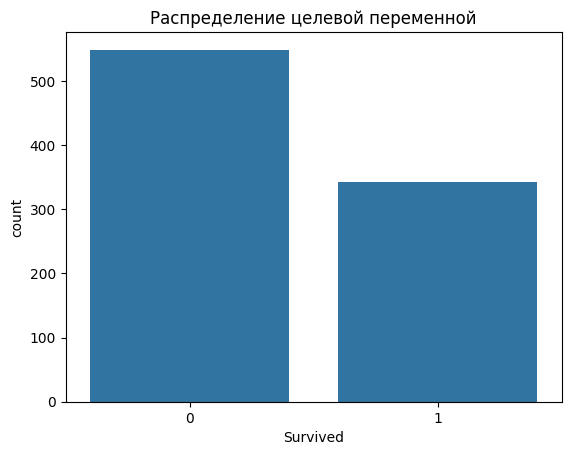

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(2), int64(6)
memory usage: 57.6 KB
None
=== KNN ===
Accuracy: 0.6567164179104478
Precision: 0.6456565874665251
Recall: 0.6567164179104478
F1-score: 0.6457190671711289


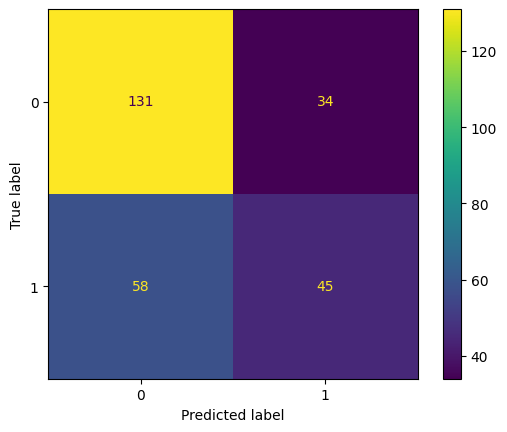

=== Random Forest ===
Accuracy: 0.8283582089552238
Precision: 0.8282899656793191
Recall: 0.8283582089552238
F1-score: 0.8250997824991259


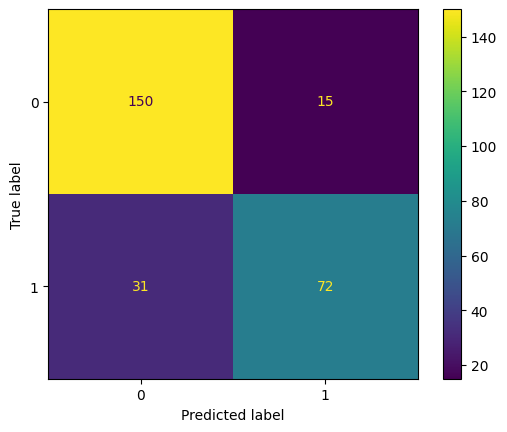

=== SVC ===
Accuracy: 0.6604477611940298
Precision: 0.6894421335943234
Recall: 0.6604477611940298
F1-score: 0.5876319363849178


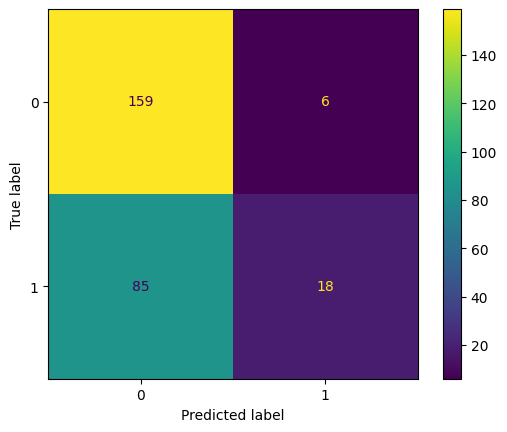

KNN: 0.5398 ± 0.0927
RandomForest: 0.8015 ± 0.0478
SVC: 0.6386 ± 0.0128


In [ ]:
# Загрузка данных датасета в соответствии с вариантом


# ДОБАВИТЬ ВАШ КОД СЮДА
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


# 1. ПОДГРУЗКА ДАННЫХ
data = pd.read_csv("train.csv")

print(data.head())


# Удаляем ненужные признаки
data = data.drop(["Name", "Ticket", "Cabin"], axis=1)

# Заполняем пропуски
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

# Label Encoding: Sex
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})

# One-Hot Encoding: Embarked
data = pd.get_dummies(data, columns=["Embarked"], drop_first=True)


# 2. EDA (распределение цели)
sns.countplot(x='Survived', data=data)
plt.title("Распределение целевой переменной")
plt.show()

print(data.info())


# 3. TRAIN/TEST SPLIT

X = data.drop("Survived", axis=1)
y = data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# 4. ОБУЧЕНИЕ МОДЕЛЕЙ
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)

knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
svc.fit(X_train, y_train)


# 5. ОЦЕНКА МОДЕЛИ
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()


print("=== KNN ===")
evaluate(knn, X_test, y_test)

print("=== Random Forest ===")
evaluate(rf, X_test, y_test)

print("=== SVC ===")
evaluate(svc, X_test, y_test)


# 6. КРОСС-ВАЛИДАЦИЯ (k=N)
N = 5  # номер студента

models = {"KNN": knn, "RandomForest": rf, "SVC": svc}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=N, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")


# 7. GRIDSEARCHCV ДЛЯ RandomForest
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}

gs = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=N,
    scoring='accuracy',
    n_jobs=-1
)

gs.fit(X_train, y_train)

print("\nЛучшие параметры:", gs.best_params_)
print("Лучший score:", gs.best_score_)




Задание 2: Регрессия

Цель: Построить модель регрессии по одному показателю из датасета (по варианту).

 Задания:
 1. Разделить данные на обучающую и тестовую выборки
 2. Обучить 3 различные модели регрессии (LinearRegression, DecisionTreeRegressor, RandomForestRegressor)
 3. Оценить качество моделей с помощью MSE, RMSE, MAE, R²
 4. Визуализировать предсказания vs реальные значения
 5. Проанализировать важность признаков в лучшей модели
 6. Проверить наличие переобучения с помощью learning curves

In [ ]:
# Создание целевой переменной для регрессии (имитация)


# ДОБАВИТЬ ВАШ КОД СЮДА

Задание 3: Кластеризация - Выявление групп

Цель: Обнаружить естественные группы в данных.

 Задания:
 1. Масштабировать данные с помощью StandardScaler
 2. Применить PCA для визуализации данных в 2D пространстве
 3. Обучить модель KMeans с разным количеством кластеров (2, 3, 4)
 4. Оценить качество кластеризации с помощью silhouette_score
 5. Сравнить результаты кластеризации с истинными метками сортов
 6. Визуализировать кластеры на графике с помощью PCA
 7. Проанализировать характеристики каждого кластера

In [ ]:
# Используем исходные данные без меток для кластеризации


# ДОБАВИТЬ ВАШ КОД СЮДА

Задание 4: Ансамблирование и подбор гиперпараметров

Цель: Создать и оптимизировать ансамблевую модель для задачи классификации.

 Задания:
 1. Создать VotingClassifier из 3 базовых моделей
 2. Обучить BaggingClassifier на основе дерева решений
 3. Обучить GradientBoostingClassifier с подбором гиперпараметров
 4. Сравнить производительность ансамблевых методов с одиночными моделями
 5. Использовать RandomizedSearchCV для оптимизации гиперпараметров лучшей модели
 6. Проанализировать кривые обучения для выявления переобучения

In [ ]:
# ДОБАВИТЬ ВАШ КОД СЮДА